In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Load the data into a Pandas DataFrame
data = pd.read_csv('https://github.com/datasets/covid-19/raw/main/data/countries-aggregated.csv')
data.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [3]:
#Check for missing values
data.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [4]:
# Drop any rows with missing values
data.dropna(inplace=True)

In [5]:
# Convert date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
# Add a column for the total number of cases
data['Total Cases'] = data['Confirmed'] + data['Recovered'] + data['Deaths']

In [7]:
# Add a column for the log of the total number of cases
data['Log Total Cases'] = np.log(data['Total Cases'])

/Users/gina/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [8]:
# Summary statistics
data.describe()

,Confirmed,Recovered,Deaths,Total Cases,Log Total Cases
count,1.615680e+05,1.615680e+05,161568.000000,1.615680e+05,1.615680e+05
mean,7.361569e+05,1.453967e+05,13999.436089,8.955531e+05,-inf
std,3.578884e+06,9.748275e+05,59113.581271,4.015516e+06,NaN
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,-inf
25%,1.220000e+03,0.000000e+00,17.000000,1.948750e+03,7.574943e+00
50%,2.369200e+04,1.260000e+02,365.000000,3.366500e+04,1.042421e+01
75%,2.558420e+05,1.797225e+04,4509.000000,3.653762e+05,1.280868e+01
max,8.062512e+07,3.097475e+07,988609.000000,8.161373e+07,1.821751e+01


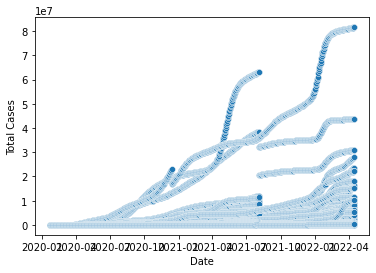

In [9]:
# Scatter plot of log of total cases per capita vs time
sns.scatterplot(x='Date', y='Total Cases', data=data)
plt.show()

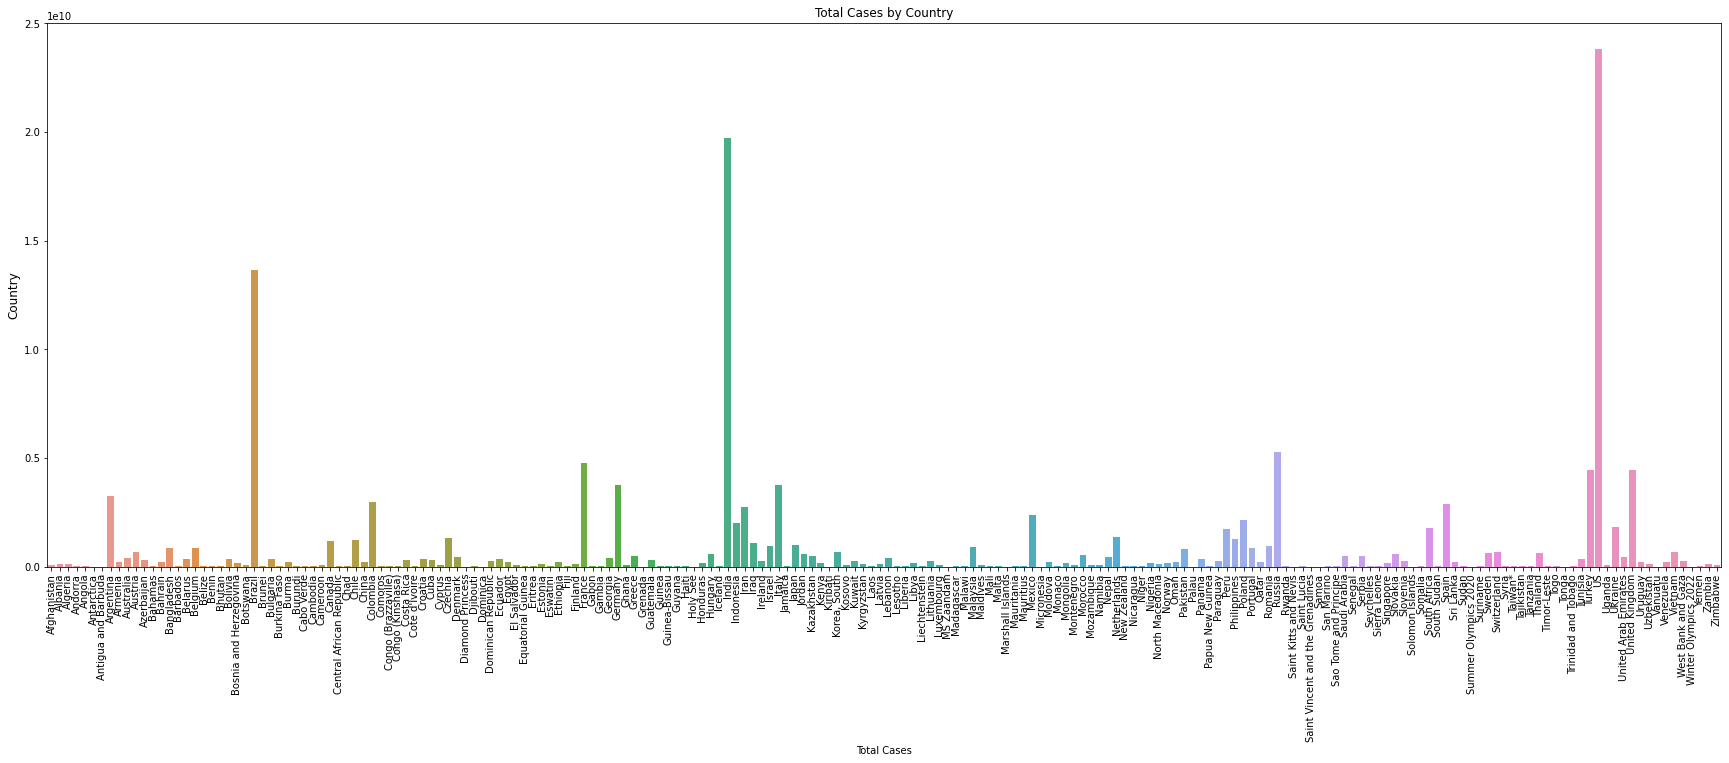

In [10]:
total_cases = data.groupby('Country')['Total Cases'].sum().reset_index()
# Bar plot of total cases by country
plt.figure(figsize=(30,10))
sns.barplot(x='Country', y='Total Cases', data=total_cases)
plt.xticks(rotation=90)
plt.xlabel('Total Cases')
plt.ylabel('Country', fontsize=12)
plt.title('Total Cases by Country')
plt.show()

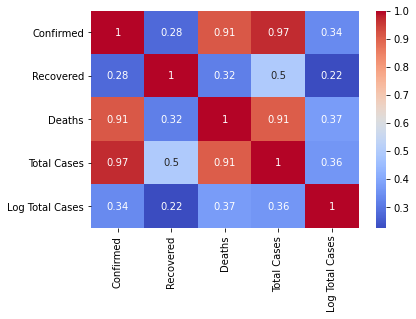

In [11]:
# Heatmap of correlation matrix
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Analysis

In [12]:
# Create X and y variables
X = data[['Confirmed', 'Recovered', 'Deaths']]
y = data['Total Cases']

In [13]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [15]:
# Ridge regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

In [16]:
# Calculate cross-validation score for Ridge model
#ridge_cv_scores = cross_val_score(ridge_model, X, y, cv=5)
#ridge_cv_mean = np.mean(ridge_cv_scores)


In [17]:
print("Ridge Regression: R2 score = {:.4f}, MSE = {:.4f}".format(ridge_r2, ridge_mse))

Ridge Regression: R2 score = 1.0000, MSE = 6382.0889


In [18]:
# Random Forest regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

In [19]:
print("Random Forest Regression: R2 score = {:.4f}, MSE = {:.4f}".format(rf_r2, rf_mse))

Random Forest Regression: R2 score = 1.0000, MSE = 340671264.3615


The R2 score, also known as the coefficient of determination, is a measure of how well the regression model fits the data. It represents the proportion of the variance in the dependent variable that is explained by the independent variables. An R2 score of 1.0 indicates a perfect fit, meaning that all of the variance in the dependent variable is explained by the independent variables. Therefore, the R2 score of 1.0 for both models suggests that they fit the data perfectly.

The mean squared error (MSE) is a measure of the average squared difference between the predicted values and the actual values. It provides a sense of how far off the predictions are from the actual values. The lower the MSE, the better the model. The MSE values of 6382.0889 for Ridge Regression and 340671264.3615 for Random Forest Regression suggest that the Ridge Regression model has lower error and is a better fit for the data. 